# Explore Embedding Data

In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
import seaborn as sbn

In [2]:
from pathlib import Path

In [7]:
root_embeddings = Path('../../data/embeddings').absolute().resolve()

In [19]:
root_text = Path('../../data/text').absolute().resolve()

In [10]:
ne1 = root_embeddings / 'w040_i020' / 'scriptures' / 'book_of_mormon' / '1-ne'

In [13]:
embeds = np.genfromtxt(ne1 / '003.embeddings.csv', delimiter=',')

In [17]:
offs = np.genfromtxt(ne1 / '003.offsets.csv', delimiter=',', dtype=int)

In [31]:
embed_means = np.genfromtxt(root_embeddings / '..' / 'means' / 'w040_i020' / 'scriptures' / 'mean.csv', delimiter='\n')

In [35]:
embeds_norm = embeds - embed_means

In [21]:
text = (root_text / 'scriptures' / 'book_of_mormon' / '1-ne' / '003.txt').read_text()

In [25]:
a,b,v = offs[0]
text[a:b]

'And it came to pass that I, Nephi, returned from speaking with the Lord, to the tent of my father.\nAnd it came to pass that he spake unto me, saying: Behold I have dreamed a dream, in the which'

In [51]:
def cos_sim(data_1, data_2):
    return np.dot(data_1, data_2.transpose())/(np.linalg.norm(data_1)*np.linalg.norm(data_2.transpose(), axis=0))

In [52]:
np.linalg.norm(embeds_norm, axis=0)

array([0.10282817, 0.0671687 , 0.08822689, ..., 0.07893424, 0.09450226,
       0.07335481])

In [53]:
cos_sim(embeds_norm[0], embeds_norm[0])

1.0000000000000002

In [54]:
cos_sim(embeds_norm[0], embeds_norm[:2])

array([1.        , 0.58959999])

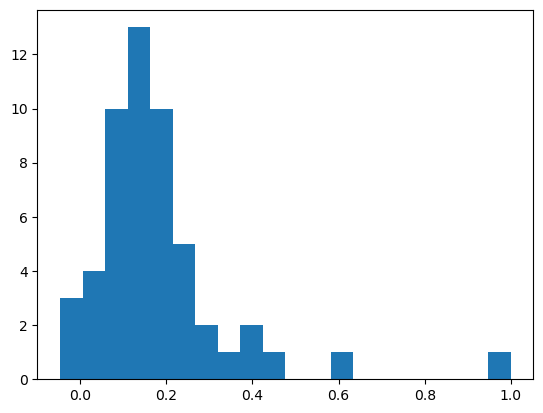

In [57]:
plt.hist(cos_sim(embeds_norm[0], embeds_norm), bins=20);